# Import relevant library

In [69]:
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import models, layers
import glob

# Get all data

In [4]:
batch_size = 32
image_size = (256, 256)
training_size = 0.8
testing_size = 0.1
validation_size = 0.1
epochs = 30

In [5]:
tomato_leaf_df = tf.keras.preprocessing.image_dataset_from_directory("archive/PlantVillage", 
                                                                    shuffle=True,
                                                                    image_size=image_size,
                                                                    batch_size=batch_size)

Found 16011 files belonging to 10 classes.


In [6]:
class_names = tomato_leaf_df.class_names
print(f"There are {len(class_names)} and ther name are: \n{class_names}")

There are 10 and ther name are: 
['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


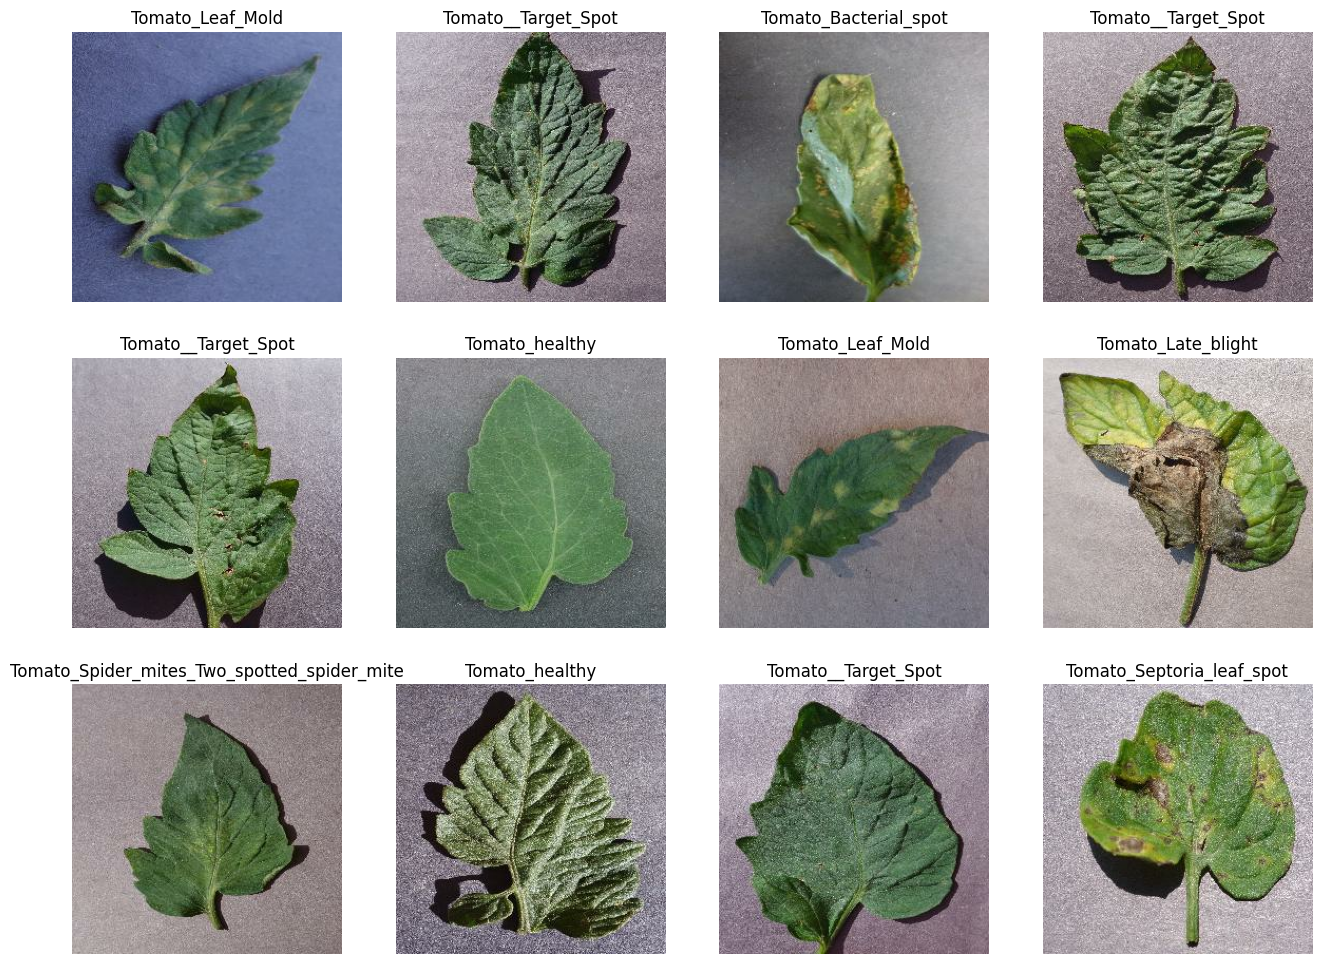

In [7]:
plt.figure(figsize=(16,12))
for image_batch, label_batch in tomato_leaf_df.take(1):
    for i in range(1,13):
        ax = plt.subplot(3, 4, i)
        plt.axis("off")
        plt.title(class_names[label_batch[i].numpy()])
        plt.imshow(image_batch[i].numpy().astype("uint32"))

# Split the data in training, testing and validation data

In [8]:
nr_baches = len(tomato_leaf_df)
training_baches_nr = int(nr_baches * training_size)
testing_baches_nr = int(nr_baches * testing_size)

In [9]:
training_tomato_leaf_df = tomato_leaf_df.take(training_baches_nr).cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
testing_tomato_leaf_df = tomato_leaf_df.skip(training_baches_nr).take(testing_baches_nr).cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_tomato_leaf_df = tomato_leaf_df.skip(training_baches_nr).skip(testing_baches_nr).cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
print(f"Total number of baches:      {nr_baches}")
print(f"Training number of baches:   {len(training_tomato_leaf_df)}")
print(f"Testing number of baches:    {len(testing_tomato_leaf_df)}")
print(f"Validation number of baches: {len(validation_tomato_leaf_df)}")

Total number of baches:      501
Training number of baches:   400
Testing number of baches:    50
Validation number of baches: 51


# Data Process and Augmentation

In [11]:
data_process = tf.keras.Sequential([
    layers.Resizing(image_size[0], image_size[1]),
    layers.Rescaling(1./255),
])

In [12]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertifal"),
    layers.RandomRotation(0.2),
])

# Create Model 

Create a CNN to identify the type of leaf

In [13]:
kernel_conv_size = (3, 3)
max_pooling_size = (2, 2)
neuron_size = 64

In [14]:
model = models.Sequential([
    data_process,
    data_augmentation,
    layers.Conv2D(32, kernel_conv_size, activation='relu', input_shape=(256, 256, 3), padding='same'),
    layers.MaxPooling2D(max_pooling_size),
    layers.Conv2D(neuron_size, kernel_size=kernel_conv_size, activation='relu', padding='same'),
    layers.MaxPooling2D(max_pooling_size),
    layers.Conv2D(neuron_size, kernel_size=kernel_conv_size, activation='relu', padding='same'),
    layers.MaxPooling2D(max_pooling_size),
    layers.Conv2D(neuron_size, kernel_size=kernel_conv_size, activation='relu', padding='same'),
    layers.MaxPooling2D(max_pooling_size),
    layers.Conv2D(neuron_size, kernel_size=kernel_conv_size, activation='relu', padding='same'),
    layers.MaxPooling2D(max_pooling_size),
    layers.Conv2D(neuron_size, kernel_size=kernel_conv_size, activation='relu', padding='same'),
    layers.MaxPooling2D(max_pooling_size),
    layers.Conv2D(neuron_size, kernel_size=kernel_conv_size, activation='relu', padding='same'),
    layers.MaxPooling2D(max_pooling_size),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\georg\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.build()

In [16]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
# tf.keras.utils.plot_model(
#     model,
#     show_shapes=True,
#     show_dtype=True,
#     show_layer_activations=True
# )

# Combile and Fit the Model

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.005),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
             )

In [19]:
calbacks = tf.keras.callbacks.EarlyStopping(patience=3, monitor='loss')

In [20]:
history = model.fit(
    training_tomato_leaf_df,
    epochs=30,
    batch_size=batch_size,
    verbose=1,
    validation_data=validation_tomato_leaf_df
)

Epoch 1/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 556s 1s/step - loss: 2.0730 - sparse_categorical_accuracy: 0.2335 - val_loss: 1.6292 - val_sparse_categorical_accuracy: 0.4209
Epoch 2/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 481s 1s/step - loss: 1.6273 - sparse_categorical_accuracy: 0.4295 - val_loss: 1.5968 - val_sparse_categorical_accuracy: 0.4500
Epoch 3/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 473s 1s/step - loss: 1.4396 - sparse_categorical_accuracy: 0.4919 - val_loss: 1.5049 - val_sparse_categorical_accuracy: 0.4420
Epoch 4/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 5895s 15s/step - loss: 1.3104 - sparse_categorical_accuracy: 0.5372 - val_loss: 1.0968 - val_sparse_categorical_accuracy: 0.6077
Epoch 5/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 424s 1s/step - loss: 1.1610 - sparse_categorical_accuracy: 0.5966 - val_loss: 1.0709 - val_sparse_categorical_accuracy: 0.6120
Epoch 6/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 424s 1s/step - loss: 1.1018 - sparse_categorical_accuracy: 0.6147 - val_loss: 1.2729 - val_sparse_categorical_accuracy: 0.5

# Evaluate the Model

In [22]:
model.evaluate(testing_tomato_leaf_df)

50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 202ms/step - loss: 0.6080 - sparse_categorical_accuracy: 0.7860


[0.6144770979881287, 0.7831249833106995]

In [26]:
acc = history.history['sparse_categorical_accuracy']
loss = history.history['loss']

In [27]:
val_acc = history.history['val_sparse_categorical_accuracy']
val_loss = history.history['val_loss']

[<Axes: > <Axes: >]


<Figure size 1600x1200 with 0 Axes>

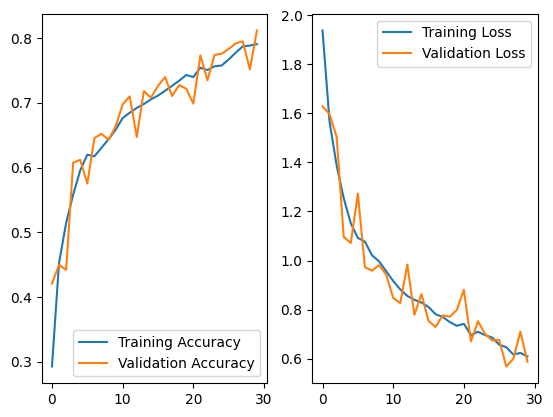

In [49]:
plt.figure(figsize=(16,12))
fig, (ax1,  ax2) = plt.subplots(1, 2)
print(axs)
ax1.plot(range(epochs), acc, label='Training Accuracy')
ax2.plot(range(epochs), loss, label='Training Loss')
ax1.plot(range(epochs), val_acc, label='Validation Accuracy')
ax2.plot(range(epochs), val_loss, label='Validation Loss')
ax1.legend()
ax2.legend()

In [53]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

first image to predict
Actual label: Tomato_Septoria_leaf_spot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
Predict label: Tomato__Target_Spot


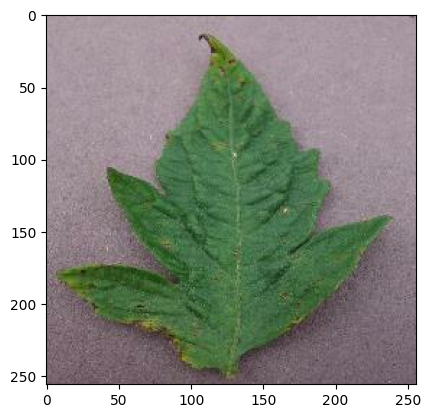

In [46]:
for images_batch, label_batch in testing_tomato_leaf_df.take(1):
    first_image = images_batch[0].numpy().astype("uint8")
    first_label = label_batch[0]
    
    print("first image to predict")
    plt.imshow(first_image)
    print(f"Actual label: {class_names[first_label]}")
    batch_prediction = model.predict(images_batch)
    print(f"Predict label: {class_names[np.argmax(batch_prediction[0])]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


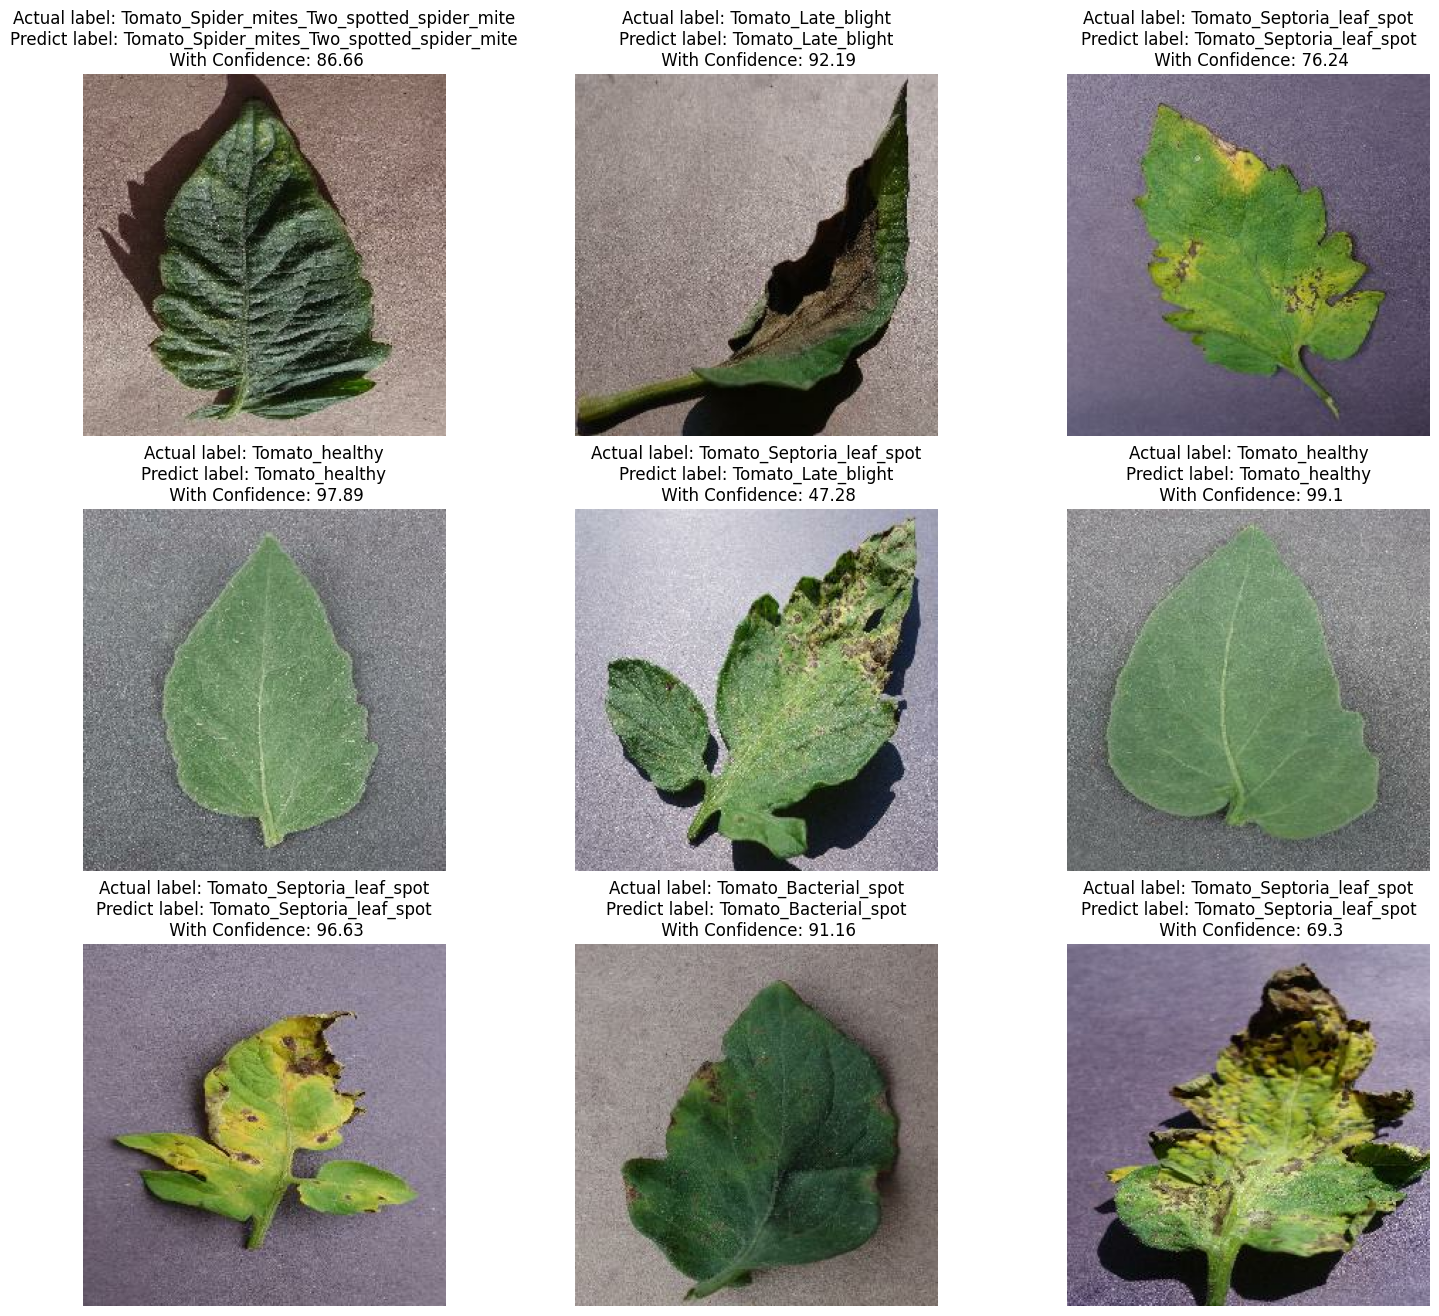

In [66]:
plt.figure(figsize=(18,16))
for image_batch, label_batch in testing_tomato_leaf_df.take(1):
    for i in range(1,10):
        ax = plt.subplot(3, 3, i)
        plt.axis("off")
        plt.imshow(image_batch[i].numpy().astype("uint32"))
        predicted_class, conf = predict(model, image_batch[i].numpy())
        plt.title(f"Actual label: {class_names[label_batch[i]]}\nPredict label: {predicted_class}\n With Confidence: {str(round(conf, 2))}")

# Save the Model

In [72]:
# models_directory = 'models'
# if os.path.isdir(models_directory):
#     os.mkdir(models_directory)
# model_version = len(glob.glob(f"{models_directory}/*")) + 1
# model.save(f"{models_directory}/tomato_leaf_model_{model_version}.h5")